In [311]:
# Initialize the workspace
from pymongo import MongoClient
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

plt.style.use('ggplot')
sns.set_style(style="whitegrid")
%matplotlib inline        

In [6]:
client = MongoClient()

In [7]:
db = client['eia_data']

In [8]:
oil_produced = db['oil_produced']
natural_gas_produced = db['natural_gas_produced']
natural_gas_flared = db['natural_gas_flared']

In [9]:
oil_produced.count_documents({})

1

In [10]:
df_op = pd.DataFrame(oil_produced.find())
# df_op.to_csv('/home/chadhutchison/Documents/Galvanize_DSI/capstone/wasted_energy/df_op.csv')

In [11]:
df_ngf = pd.DataFrame(natural_gas_flared.find())
# df_ngf.to_csv('/home/chadhutchison/Documents/Galvanize_DSI/capstone/wasted_energy/df_ngf.csv')

In [12]:
df_ngp = pd.DataFrame(natural_gas_produced.find())
# df_ngp.to_csv('/home/chadhutchison/Documents/Galvanize_DSI/capstone/wasted_energy/df_ngp.csv')

In [42]:
# df_op = pd.read_csv('/home/chadhutchison/Documents/Galvanize_DSI/capstone/wasted_energy/df_op.csv')
# df_ngp = pd.read_csv('/home/chadhutchison/Documents/Galvanize_DSI/capstone/wasted_energy/df_ngp.csv')
# df_ngf = pd.read_csv('/home/chadhutchison/Documents/Galvanize_DSI/capstone/wasted_energy/df_ngf.csv')


In [13]:
df_op

,_id,alabama,alaska,arizona,arkansas,california,colorado,federal offshore (padd 3),federal offshore (padd 5),florida,...,pennsylvania,south alaska,south dakota,tennessee,texas,us,utah,virginia,west virginia,wyoming
0,5f177eaba2b9a7958333bc63,"[, 20,680, 20,014, 18,746, 19,804, 21,581, 21,...","[, 587,337, 618,910, 625,527, 630,401, 666,233...","[, 357, 335, 237, 215, 175, 161, 131, 113, 137...","[, 18,352, 18,849, 18,849, 18,730, 19,044, 15,...","[, 365,370, 373,176, 374,161, 381,621, 394,002...","[, 30,303, 30,545, 29,050, 28,845, 30,246, 29,...","[, 262,518, 286,725, 319,717, 349,857, 343,443...","[, 19,588, 28,396, 30,527, 30,399, 29,875, 28,...","[, 34,773, 25,626, 19,476, 14,462, 11,458, 9,3...",...,"[, 3,729, 4,282, 4,282, 4,284, 4,851, 3,783, 3...","[, 31,072, 27,404, 24,769, 21,983, 16,946, 17,...","[, 973, 1,158, 1,172, 1,340, 1,596, 1,586, 1,6...","[, 918, 1,132, 1,056, 920, 786, 644, 614, 601,...","[, 932,350, 908,217, 882,911, 883,174, 869,218...","[, , , , , , , , , 2, 500, 2,114, 3,057, 2,611...","[, 25,860, 22,440, 29,534, 34,689, 40,792, 39,...","[, 13, 49, 65, 32, 26, 18, 17, 25, 23, 16, 13,...","[, 3,473, 3,227, 3,628, 3,524, 3,555, 3,145, 2...","[, 130,563, 118,300, 118,303, 124,269, 128,514..."


In [14]:
df_op = df_op.loc[ : , 'alabama' : ]
df_ngp = df_ngp.loc[ : , 'alabama' : ]
df_ngf = df_ngf.loc[ : , 'alabama' : ]
df_ngf.head()

,alabama,alabama onshore,alabama state offshore,alaska,alaska onshore,alaska state offshore,arizona,arkansas,california,california onshore,...,south dakota,tennessee,texas,texas onshore,texas state offshore,us,utah,virginia,west virginia,wyoming
0,"[, , , , , , , 360, 422, 795, 656, 308, 966, 1...","[, , 1,727, 1,513, 2,072, 2,564, 1,593, 1,320,...","[, , 72, 284, 577, 371, 260, 243, 296, 303, 24...","[, , , , , , , 11,390, 24,258, 32,543, 34,808,...","[, , 9,481, 11,262, 8,733, 7,105, 5,942, 6,401...","[, , 4,616, 11,224, 4,507, 1,631, 1,128, 1,868...","[, 347, 367, 277, 26, 47, 32, , , 101, 143, 10...","[, , , , , , , 997, 895, 1,326, 226, 1,734, 2,...","[, , , , , , , 3,565, 2,780, 3,074, 2,499, 575...","[, , 751, 580, 830, 1,250, 1,268, 1,590, 1,952...",...,"[, , , , , , , 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 5...","[, , , , , , , 0, 0, 0, 0, 408, 180, 165, 376,...","[, , , , , , , 129,403, 124,584, 111,499, 100,...","[, , 19,689, 34,486, 42,037, 46,183, 45,382, 4...","[, , , 0, NA, NA, NA, NA, 0, 0, 0, 0, 0, 0, NA...","[, , , , , , 392,528, 526,159, 649,106, 677,31...","[, , , , , , , 3,000, 2,906, 2,802, 2,852, 2,9...","[, , , , , , , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[, , , , , , 0, 0, 0, 0, 0, 0, 0, 0, NA, 0, NA...","[, , , , , , , 1,498, 13,038, 17,632, 18,419, ..."


In [10]:
for val in df_op['alabama']:
    print(type(val))

<class 'list'>


In [10]:
#cast data type to int64
# test = df_op['alabama'].copy()
# before = type(test)

# test = test.astype('int64')
# after = type(test)
# print(before)
# print()
# print(after)

In [46]:
# #clean up oil produced data
# df_op_exp.insert(0, 'year', range(1980, 2020)) 
# df_op_exp.insert(1, 'us', us_)
# df_op_exp.drop(0, axis=0, inplace=True)
# for col_name in ['padd 1', 'padd 2', 'padd 3', 'padd 4', 'padd 5']:
#     df_op_exp.drop(col_name, axis=1, inplace=True)


In [47]:
# df_op_exp.head()

In [15]:
def clean_dfs(df, earliest_year): #make function to clean dataframes
    n = 2020 - earliest_year #length of longest data series
    df_cols = df.columns
    df_clean = pd.DataFrame({'year': range(earliest_year, 2020)}) # initialize new df w/ ealiest starting year - 2019
    for c in df_cols:
        for val in df[c]:
            diff = n - len(val)
            #print(pd.Series(list(np.zeros(diff))+val))
            data = list(np.zeros(diff)) + val
            df_clean[c] = pd.Series(data)

    return df_clean
   
        
        






In [17]:
df_op_clean = clean_dfs(df_op, 1850)
df_op_clean.head(10)

,year,alabama,alaska,arizona,arkansas,california,colorado,federal offshore (padd 3),federal offshore (padd 5),florida,...,pennsylvania,south alaska,south dakota,tennessee,texas,us,utah,virginia,west virginia,wyoming
0,1850,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,,0,0,0,0
1,1851,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,,0,0,0,0
2,1852,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,,0,0,0,0
3,1853,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,,0,0,0,0
4,1854,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,,0,0,0,0
5,1855,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,,0,0,0,0
6,1856,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,,0,0,0,0
7,1857,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,,0,0,0,0
8,1858,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,,0,0,0,0
9,1859,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [19]:
df_ngp_clean = clean_dfs(df_ngp, 1930)
df_ngp_clean.tail(10)

,year,alabama,alabama offshore,alabama onshore,alabama state offshore,alaska,alaska offshore,alaska onshore,alaska state offshore,arizona,...,texas offshore,texas onshore,texas state offshore,us,us offshore,us state offshore,utah,virginia,west virginia,wyoming
80,2010,"240,703","101,487","139,215","101,487","3,197,100","370,148","2,826,952","370,148",183,...,"28,574","7,565,123","28,574","26,816,085","2,875,945","575,601","436,885","147,255","265,174","2,514,657"
81,2011,"218,574","84,270","134,305","84,270","3,162,922","364,702","2,798,220","364,702",168,...,"23,791","7,910,898","23,791","28,479,026","2,416,644","549,151","461,507","151,094","394,125","2,375,301"
82,2012,"215,710","87,398","128,312","87,398","3,164,791","307,306","2,857,485","307,306",117,...,"16,506","8,127,004","16,506","29,542,313","2,044,643","489,505","490,393","146,405","539,860","2,225,622"
83,2013,"196,326","75,660","120,666","75,660","3,215,358","332,402","2,882,956","332,402",72,...,"14,036","8,285,436","14,036","29,522,551","1,859,469","505,318","470,863","139,382","741,853","2,047,757"
84,2014,"181,060","70,829","110,232","70,829","3,168,545","365,135","2,803,410","365,135",106,...,"11,200","8,647,988","11,200","31,405,381","1,804,544","514,291","454,545","133,661","1,067,114","1,998,505"
85,2015,"168,246","64,184","104,062","64,184","3,175,301","370,657","2,804,644","370,657",95,...,"9,302","8,790,163","9,302","32,914,647","1,825,337","502,948","417,020","127,586","1,315,248","1,995,920"
86,2016,"164,815","65,009","99,806","65,009","3,230,193","361,678","2,868,514","361,678",47,...,"7,542","8,148,755","7,542","32,591,578","1,709,055","483,900","365,268","120,288","1,384,458","1,848,623"
87,2017,"150,038","60,931","89,107","60,931","3,250,769","369,016","2,881,753","369,016",56,...,"4,978","8,074,996","4,978","33,292,113","1,556,679","474,511","315,211","115,452","1,514,278","1,715,732"
88,2018,"139,485","57,069","82,416","57,069","3,254,712","372,398","2,882,314","372,398",46,...,"3,736","8,911,530","3,736","37,129,374","1,456,689","460,179","296,810","111,476","1,799,097","1,720,897"
89,2019,,,,,"3,250,422",,,,,...,,,,"40,704,488",,,"274,689",,"2,156,454","1,547,504"


In [20]:
df_ngf_clean = clean_dfs(df_ngf, 1930)
df_ngf_clean.tail()

,year,alabama,alabama onshore,alabama state offshore,alaska,alaska onshore,alaska state offshore,arizona,arkansas,california,...,south dakota,tennessee,texas,texas onshore,texas state offshore,us,utah,virginia,west virginia,wyoming
85,2015,0,NA,NA,"5,385","4,755",630,0,0,0,...,"13,957",0,"113,786","113,786",NA,"289,545",0,0,0,"3,473"
86,2016,NA,NA,NA,"8,541","7,557",984,0,NA,NA,...,0,0,"87,527","87,527",NA,"230,410",NA,NA,NA,"11,610"
87,2017,0,NA,NA,"7,605","6,739",866,0,0,0,...,0,0,NA,"123,405",0,NA,0,0,0,"18,417"
88,2018,0,NA,NA,"8,210","7,229",981,0,0,0,...,0,0,"238,054","238,054",0,"468,347",0,0,0,"8,958"
89,2019,,,,,,,,,,...,,,,,,,,,,


In [23]:
#remove commas

def remove_comma(df):
    for val in df:
        df[val].replace(',', '', regex=True, inplace=True)
    return df
    

In [24]:
test = remove_comma(df_op_clean)
test.tail()

,year,alabama,alaska,arizona,arkansas,california,colorado,federal offshore (padd 3),federal offshore (padd 5),florida,...,pennsylvania,south alaska,south dakota,tennessee,texas,us,utah,virginia,west virginia,wyoming
165,2015,9694,176229,37,6229,201284,123375,552929,11430,2208,...,7088,6686,1666,296,1258637,3445138,37136,11,11572,86472
166,2016,8107,179378,8,5519,186079,118118,585219,6143,1934,...,6272,5643,1407,257,1165660,3235183,30528,7,7636,72647
167,2017,6827,180547,13,5288,173403,132894,613252,5713,1923,...,6562,5272,1305,271,1271144,3413417,34438,7,9469,75718
168,2018,5884,174800,11,5018,169166,177817,641503,4874,1839,...,6478,5563,1273,210,1609075,4011521,37063,5,11618,87955
169,2019,4818,169947,7,4665,161485,187563,687239,4582,1784,...,6325,5211,1162,201,1850284,4464808,37442,4,16506,101656


In [25]:
#apply to 3 dfs
df_op_nocomm = remove_comma(df_op_clean)
df_ngp_nocomm = remove_comma(df_ngp_clean)
df_ngf_nocomm = remove_comma(df_ngf_clean)

In [26]:
df_ngf_nocomm.tail()

,year,alabama,alabama onshore,alabama state offshore,alaska,alaska onshore,alaska state offshore,arizona,arkansas,california,...,south dakota,tennessee,texas,texas onshore,texas state offshore,us,utah,virginia,west virginia,wyoming
85,2015,0,NA,NA,5385,4755,630,0,0,0,...,13957,0,113786,113786,NA,289545,0,0,0,3473
86,2016,NA,NA,NA,8541,7557,984,0,NA,NA,...,0,0,87527,87527,NA,230410,NA,NA,NA,11610
87,2017,0,NA,NA,7605,6739,866,0,0,0,...,0,0,NA,123405,0,NA,0,0,0,18417
88,2018,0,NA,NA,8210,7229,981,0,0,0,...,0,0,238054,238054,0,468347,0,0,0,8958
89,2019,,,,,,,,,,...,,,,,,,,,,


In [27]:
#force to numeric

def to_numeric(df):
    for val in df:
        df[val] = df[val].apply(pd.to_numeric, errors='coerce')
    return df

In [29]:
test_ = to_numeric(df_op_nocomm)
test_.tail()

,year,alabama,alaska,arizona,arkansas,california,colorado,federal offshore (padd 3),federal offshore (padd 5),florida,...,pennsylvania,south alaska,south dakota,tennessee,texas,us,utah,virginia,west virginia,wyoming
165,2015,9694.0,176229.0,37.0,6229.0,201284.0,123375.0,552929.0,11430.0,2208.0,...,7088.0,6686.0,1666.0,296.0,1258637.0,3445138.0,37136.0,11.0,11572.0,86472.0
166,2016,8107.0,179378.0,8.0,5519.0,186079.0,118118.0,585219.0,6143.0,1934.0,...,6272.0,5643.0,1407.0,257.0,1165660.0,3235183.0,30528.0,7.0,7636.0,72647.0
167,2017,6827.0,180547.0,13.0,5288.0,173403.0,132894.0,613252.0,5713.0,1923.0,...,6562.0,5272.0,1305.0,271.0,1271144.0,3413417.0,34438.0,7.0,9469.0,75718.0
168,2018,5884.0,174800.0,11.0,5018.0,169166.0,177817.0,641503.0,4874.0,1839.0,...,6478.0,5563.0,1273.0,210.0,1609075.0,4011521.0,37063.0,5.0,11618.0,87955.0
169,2019,4818.0,169947.0,7.0,4665.0,161485.0,187563.0,687239.0,4582.0,1784.0,...,6325.0,5211.0,1162.0,201.0,1850284.0,4464808.0,37442.0,4.0,16506.0,101656.0


In [30]:
op_df = to_numeric(df_op_nocomm)
ngp_df = to_numeric(df_ngp_nocomm)
ngf_df = to_numeric(df_ngf_nocomm)

In [61]:
ngf_df['us'][87] = ngf_df.iloc[87].sum()

/home/chadhutchison/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


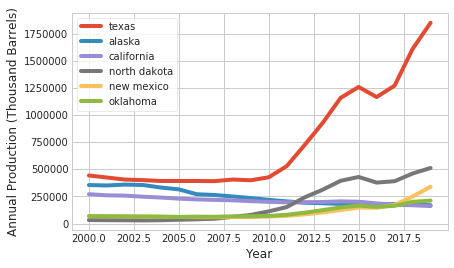

In [312]:
top_producers = ['texas', 'alaska', 'california', 'north dakota', 'new mexico', 'oklahoma']
fig, ax = plt.subplots()
for i in top_producers:
    ax.plot(op_df['year'].tail(20), op_df[i].tail(20))
    ax.legend(top_producers)
    ax.set_xlabel('Year')
    ax.set_ylabel("Annual Production (Thousand Barrels)")
    


In [125]:
## Build function for getting data f/ texas vs. US

# def compare_two(df1, df2, df3, start_year=1980, first='texas', second='us'):
#     n = 2020 - start_year
#     df_new = pd.DataFrame({'year': range(start_year, 2020)})
#     df_new[first + '-OP'] = pd.Series(df1[first][-n: ])
#     df_new[second + '-OP'] = df1[second].tail(n)
#     df_new[first + '-NGP'] = df2[first].tail(n)
#     df_new[second + '-NGP'] = df2[second].tail(n)
#     df_new[first + '-NGF'] = df3[first].tail(n)
#     df_new[second + '-NGF'] = df3[second].tail(n)
#     return df_new

In [63]:
df_tx_us = pd.DataFrame({'year': range(1980, 2020)})
df_tx_us['texas-OP'] = op_df['texas'][-40 : ].to_numpy()
df_tx_us['texas-NGP'] = ngp_df['texas'][-40 : ].to_numpy()
df_tx_us['texas-NGF'] = ngf_df['texas'][-40 : ].to_numpy()
df_tx_us['texas-NGF'][37] = 123405

df_tx_us['us-OP'] = op_df['us'][-40 : ].to_numpy()
df_tx_us['us-NGP'] = ngp_df['us'][-40 : ].to_numpy()
df_tx_us['us-NGF'] = ngf_df['us'][-40 : ].to_numpy()


df_tx_us['us minus texas-OP'] = df_tx_us['us-OP'] - df_tx_us['texas-OP']
df_tx_us['us minus texas-NGP'] = df_tx_us['us-NGP'] - df_tx_us['texas-NGP']
df_tx_us['us minus texas-NGF'] = df_tx_us['us-NGF'] - df_tx_us['texas-NGF']


df_tx_us.tail(10)

/home/chadhutchison/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,year,texas-OP,texas-NGP,texas-NGF,us-OP,us-NGP,us-NGF,us minus texas-OP,us minus texas-NGP,us minus texas-NGF
30,2010,426755.0,7593697.0,39569.0,2001756.0,26816085.0,165928.0,1575001.0,19222388.0,126359.0
31,2011,529563.0,7934689.0,35248.0,2068316.0,28479026.0,209439.0,1538753.0,20544337.0,174191.0
32,2012,724516.0,8143510.0,47530.0,2385703.0,29542313.0,212848.0,1661187.0,21398803.0,165318.0
33,2013,927645.0,8299472.0,76113.0,2734901.0,29522551.0,260394.0,1807256.0,21223079.0,184281.0
34,2014,1158470.0,8659188.0,90125.0,3207209.0,31405381.0,293916.0,2048739.0,22746193.0,203791.0
35,2015,1258637.0,8799465.0,113786.0,3445138.0,32914647.0,289545.0,2186501.0,24115182.0,175759.0
36,2016,1165660.0,8156296.0,87527.0,3235183.0,32591578.0,230410.0,2069523.0,24435282.0,142883.0
37,2017,1271144.0,8079974.0,123405.0,3413417.0,33292113.0,1484535.0,2142273.0,25212139.0,1361130.0
38,2018,1609075.0,8915266.0,238054.0,4011521.0,37129374.0,468347.0,2402446.0,28214108.0,230293.0
39,2019,1850284.0,10222840.0,NaN,4464808.0,40704488.0,NaN,2614524.0,30481648.0,NaN


In [302]:
# convert MMcf and bbl to kWh
# 1 bbl oil = 1700 kWh
# 1 cu. ft. NG = 0.29 kWh / 1 MM cu. ft. = 293071 kWh
df_tx_us['texas-OP(kWh)'] = df_tx_us['texas-OP']*1700
df_tx_us['texas-NGP(kWh)'] = df_tx_us['texas-NGP']*293071
df_tx_us['texas-NGF(kWh)'] = df_tx_us['texas-NGF']*293071

df_tx_us['us-OP(kWh)'] = df_tx_us['us-OP']*1700
df_tx_us['us-NGP(kWh)'] = df_tx_us['us-NGP']*293071
df_tx_us['us-NGF(kWh)'] = df_tx_us['us-NGF']*293071


df_tx_us['us minus texas-OP(kWh)'] = df_tx_us['us minus texas-OP']*1700
df_tx_us['us minus texas-NGP(kWh)'] = df_tx_us['us minus texas-NGP']*293071
df_tx_us['us minus texas-NGF(kWh)'] = df_tx_us['us minus texas-NGF']*293071


df_tx_us['texas waste ratio'] = df_tx_us['texas-NGF(kWh)'] / (df_tx_us['texas-OP(kWh)'] + df_tx_us['texas-NGP(kWh)'])  
df_tx_us['us waste ratio'] = df_tx_us['us minus texas-NGF(kWh)'] / (df_tx_us['us minus texas-OP(kWh)'] + df_tx_us['us minus texas-NGP(kWh)'])

df_tx_us['texas total energy produced (kWh)'] = df_tx_us['texas-OP(kWh)'] + df_tx_us['texas-NGP(kWh)']
df_tx_us['us total energy produced (kWh)'] = df_tx_us['us-OP(kWh)'] + df_tx_us['us-NGP(kWh)']
df_tx_us['us minus texas total energy produced (kWh)'] = df_tx_us['us total energy produced (kWh)'] - df_tx_us['texas total energy produced (kWh)']
df_tx_us.tail()

,year,texas-OP,texas-NGP,texas-NGF,us-OP,us-NGP,us-NGF,us minus texas-OP,us minus texas-NGP,us minus texas-NGF,...,us-NGP(kWh),us-NGF(kWh),us minus texas-OP(kWh),us minus texas-NGP(kWh),us minus texas-NGF(kWh),texas waste ratio,us waste ratio,texas total energy produced (kWh),us total energy produced (kWh),us minus texas total energy produced (kWh)
35,2015,1258637.0,8799465.0,113786.0,3445138.0,32914647.0,289545.0,2186501.0,24115182.0,175759.0,...,9.646329e+12,8.485724e+10,3.717052e+09,7.067461e+12,5.150987e+10,0.012920,0.007284,2.581008e+12,9.652185e+12,7.071178e+12
36,2016,1165660.0,8156296.0,87527.0,3235183.0,32591578.0,230410.0,2069523.0,24435282.0,142883.0,...,9.551646e+12,6.752649e+10,3.518189e+09,7.161273e+12,4.187486e+10,0.010722,0.005845,2.392355e+12,9.557146e+12,7.164791e+12
37,2017,1271144.0,8079974.0,123405.0,3413417.0,33292113.0,1484535.0,2142273.0,25212139.0,1361130.0,...,9.756953e+12,4.350742e+11,3.641864e+09,7.388947e+12,3.989077e+11,0.015259,0.053960,2.370167e+12,9.762756e+12,7.392589e+12
38,2018,1609075.0,8915266.0,238054.0,4011521.0,37129374.0,468347.0,2402446.0,28214108.0,230293.0,...,1.088154e+13,1.372589e+11,4.084158e+09,8.268737e+12,6.749220e+10,0.026674,0.008158,2.615541e+12,1.088836e+13,8.272821e+12
39,2019,1850284.0,10222840.0,NaN,4464808.0,40704488.0,NaN,2614524.0,30481648.0,NaN,...,1.192931e+13,NaN,4.444691e+09,8.933287e+12,NaN,NaN,NaN,2.999163e+12,1.193690e+13,8.937732e+12


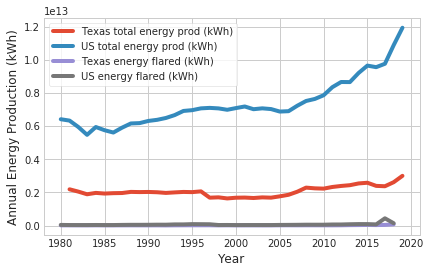

In [313]:
fig, ax = plt.subplots()

ax.plot(df_tx_us['year'], df_tx_us['texas total energy produced (kWh)'])
ax.plot(df_tx_us['year'], df_tx_us['us total energy produced (kWh)'])
ax.plot(df_tx_us['year'], df_tx_us['texas-NGF(kWh)'])
ax.plot(df_tx_us['year'], df_tx_us['us-NGF(kWh)'])
ax.legend(['Texas total energy prod (kWh)', 'US total energy prod (kWh)', 'Texas energy flared (kWh)', 'US energy flared (kWh)'])
ax.set_xlabel('Year')
ax.set_ylabel("Annual Energy Production (kWh)")
plt.show()   

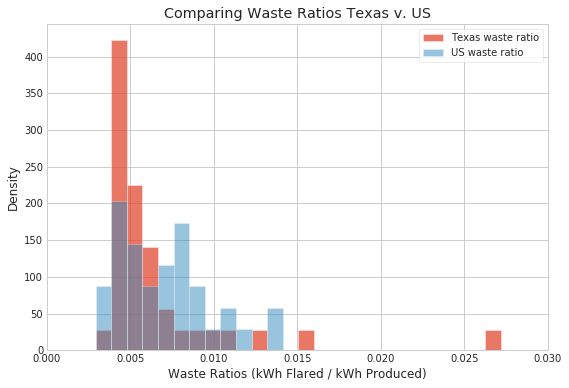

In [308]:
fig, ax = plt.subplots(figsize=(8,6))
b = np.linspace(np.min(df_tx_us['texas waste ratio']), 0.030, 30)

ax.hist(df_tx_us['texas waste ratio'], bins=b, alpha=0.75, density=True)

ax.hist(df_tx_us['us waste ratio'], bins=b, alpha=0.5, density=True)


ax.legend(['Texas waste ratio',  'US waste ratio'], loc='upper right', bbox_to_anchor=(1,1))
ax.set_title('Comparing Waste Ratios Texas v. US')
ax.set_xlabel('Waste Ratios (kWh Flared / kWh Produced)')
ax.set_ylabel('Density')
ax.set_xticks(np.arange(0, 0.05, step=0.005))
ax.set_xlim(0, 0.03)
plt.show()

In [187]:
#assign samples to vars
us_ratios = df_tx_us['us waste ratio']
texas_ratios = df_tx_us['texas waste ratio']
print(type(texas_ratios))

<class 'pandas.core.series.Series'>


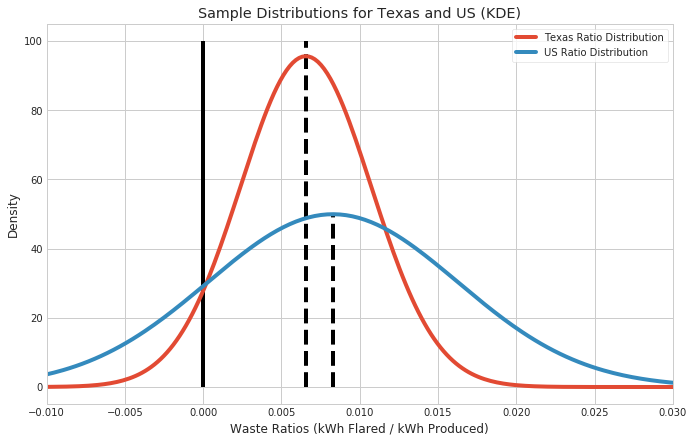

In [315]:
tex_loc = np.mean(texas_ratios)
us_loc = np.mean(us_ratios)
tex_scale = np.std(texas_ratios)
us_scale = np.std(us_ratios)
x = np.linspace(-0.03, .03, 300)

texas_norm = stats.norm.pdf(x, loc=tex_loc, scale=tex_scale)
us_norm = stats.norm.pdf(x, loc=us_loc, scale=us_scale)

fig, ax = plt.subplots(figsize= (10,7))
#sns.distplot(texas_ratios[~np.isnan(texas_ratios)], hist=False, kde=True)
#sns.distplot(us_ratios[~np.isnan(us_ratios)], hist=False, kde=True)
ax.plot(x, texas_norm,label='Texas Sample Distribution')
ax.plot(x, us_norm, label='US Sample Distribution')

zero = ax.vlines(0, 0, 100)
ax.vlines(tex_loc, 0, 100,linestyles='dashed', label='Mean (Texas)' )
ax.vlines(us_loc, 0, 50, linestyles='dashed', Label="Mean (US)" )
ax.set_title('Sample Distributions for Texas and US (KDE)')
ax.set_xlabel('Waste Ratios (kWh Flared / kWh Produced)')
ax.set_ylabel('Density')
ax.legend(["Texas Ratio Distribution", "US Ratio Distribution"])
ax.set_xlim(-0.01, 0.03)
plt.show()

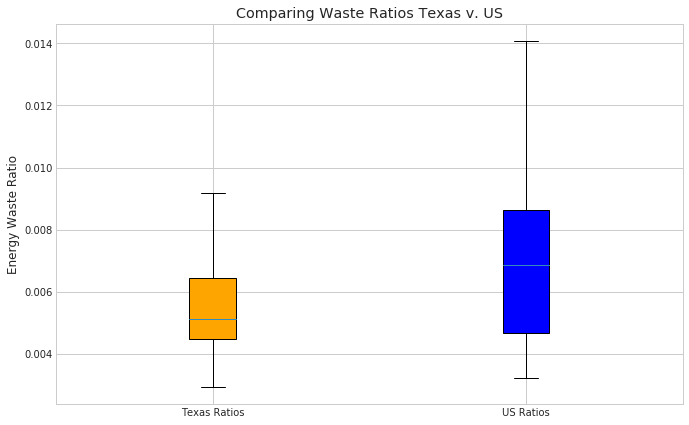

In [367]:
## box plots for two samples:
fig, ax = plt.subplots(figsize= (10,7))
#ax = fig.add_axes([0,0,1,1])
data = [texas_ratios[~np.isnan(texas_ratios)], us_ratios[~np.isnan(us_ratios)]]
b = ax.boxplot(data, showfliers=False, patch_artist=True,meanline=True )
ax.set_xticklabels(['Texas Ratios', 'US Ratios'])
ax.set_ylabel('Energy Waste Ratio')
ax.set_title('Comparing Waste Ratios Texas v. US')

colors = ['orange', 'blue']
for plot in b:
    for patch, color in zip(b['boxes'], colors):
        patch.set_facecolor(color)

plt.show()


In [ ]:
## plot dis for both samples:


In [175]:
# # distribution of wasted energy for us by year
# fig, ax = plt.subplots()
# ax.hist(df_tx_us['us-NGF(kWh)'] / 1000000)
# plt.show()

In [ ]:
# Confirm CLT w/ samples
#def CLT(ax, df, samples, xlim=None, print_output=False)

## Based on the distributions of Texas and US,it cannot be assumed that the distributions are normally distributed. There are greater than 30 datapoints in the samples (1970-2019), so therefore we can assume that the CLT applies and, becuase we are interested in the mean values, the sample distribution means will approximately equal the population mean. 

###  Welch's t-test: two-sample location test which is used to test the hypothesis that two populations have equal means. Welch's was chosen because the variance / sample sizes are not known. 

 - Assumptions: 
     1. Unequal sample distribution variance
     2. Sample distribution normality is maintained
     

In [153]:
#welch's t test, independent random samples and normally distributed populations

def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + \
                        (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [156]:
test_statistic = welch_test_statistic(texas_ratios, us_ratios)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: -1.21


In [213]:
stats.ttest_ind(texas_ratios, us_ratios, nan_policy='omit')

Ttest_indResult(statistic=-1.1638392979362848, pvalue=0.24822795864357775)

In [157]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [158]:
df = welch_satterhwaithe_df(texas_ratios, us_ratios)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

Degrees of Freedom for Welch's Test: 58.81


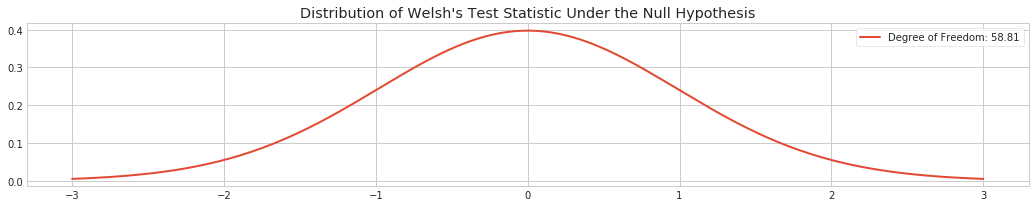

In [170]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

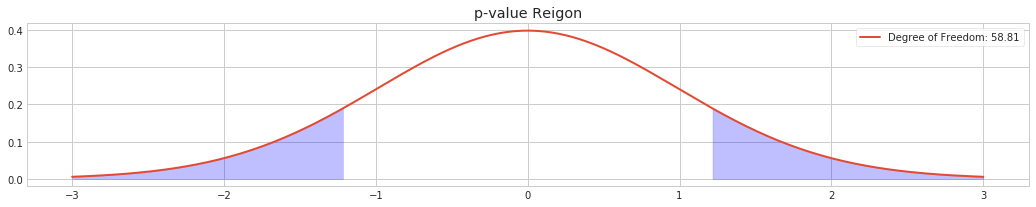

In [171]:
# p-val
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
_ = ax.fill_between(x, students.pdf(x), where=(x >= -test_statistic), color="blue", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= test_statistic), color="blue", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon");

In [173]:
p_value = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
print("p-value for different ratios of energy waste: {:2.2f}".format(p_value))

p-value for different ratios of energy waste: 0.23


In [174]:
test_statistic = welch_test_statistic(texas_ratios, us_ratios)

p_value = 1 - students.cdf(test_statistic)
print("p-value for Texas average waste ratio greater than US: {:2.3f}".format(p_value))

p-value for Texas average waste ratio greater than US: 0.884


In [345]:
#I REJECT THE NULL!
df_ng_price = pd.read_csv('/home/chadhutchison/Documents/Galvanize_DSI/capstone/wasted_energy/nat_gas_prices.csv')
df_ng_price = df_ng_price.iloc[13: , :]
df_ng_price.iloc[ : , 1].head()

13    3.95
14    3.75
15    3.22
16    2.87
17    2.92
Name: Data 1: U.S. Natural Gas Citygate Price (Dollars per Thousand Cubic Feet), dtype: object

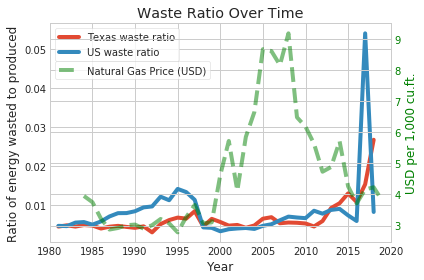

In [361]:
fig, ax = plt.subplots()

ax.plot(df_tx_us['year'], (df_tx_us['texas-NGF(kWh)'] / df_tx_us['texas total energy produced (kWh)']))
ax.plot(df_tx_us['year'], (df_tx_us['us minus texas-NGF(kWh)'] / df_tx_us['us minus texas total energy produced (kWh)']))
ax.legend(['Texas waste ratio', 'US waste ratio'])
ax.set_xlabel('Year')
ax.set_ylabel("Ratio of energy wasted to produced")
ax.set_title("Waste Ratio Over Time")
ax.set_xlim(1980, 2020)

ax1 = ax.twinx()
ax1.plot(pd.to_numeric(df_ng_price.iloc[ : , 0]), pd.to_numeric(df_ng_price.iloc[ : , 1]), color='green', linestyle='dashed', alpha=0.5) 
ax1.set_ylabel('USD per 1,000 cu.ft.', color='green')  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(['Natural Gas Price (USD)'], loc='upper left', bbox_to_anchor=(0,0.85) )
fig.tight_layout()
plt.show()

Texas Total Energy Wasted: 542186.918349 GWh, US Total Energy Wasted: 1775982.418255 GWh


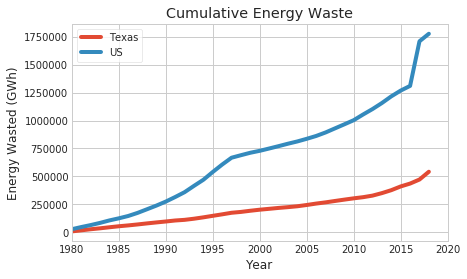

In [334]:
## two plots for energy wasted (cumulative energy waste over time?)
us_tot_waste = df_tx_us['us minus texas-NGF(kWh)'].sum() / 1000000
tex_tot_waste = df_tx_us['texas-NGF(kWh)'].sum() / 1000000
fig, ax = plt.subplots()
ax.plot(df_tx_us['year'], df_tx_us['texas-NGF(kWh)'].cumsum() / 1000000)
ax.plot(df_tx_us['year'], df_tx_us['us minus texas-NGF(kWh)'].cumsum() / 1000000)
ax.set_xlabel('Year')
ax.set_ylabel("Energy Wasted (GWh)")
ax.set_title("Cumulative Energy Waste")
ax.set_xlim(1980, 2020)
ax.legend(['Texas', 'US'])
print('Texas Total Energy Wasted: {} GWh, US Total Energy Wasted: {} GWh'.format(tex_tot_waste, us_tot_waste))
plt.show()

In [327]:
df_tx_us['us minus texas-NGF(kWh)'].sum()

1775982418255.0